In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

### (a)

In [2]:
df = pd.read_csv('../data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

There are 506 rows and 14 columns in this dataset.

It means the sample size is 506, and there are 14 variables.

### (b)

In [4]:
cols = list(df.columns)
size = len(cols)
first_half, last_half = cols[:size // 2], cols[size // 2:]

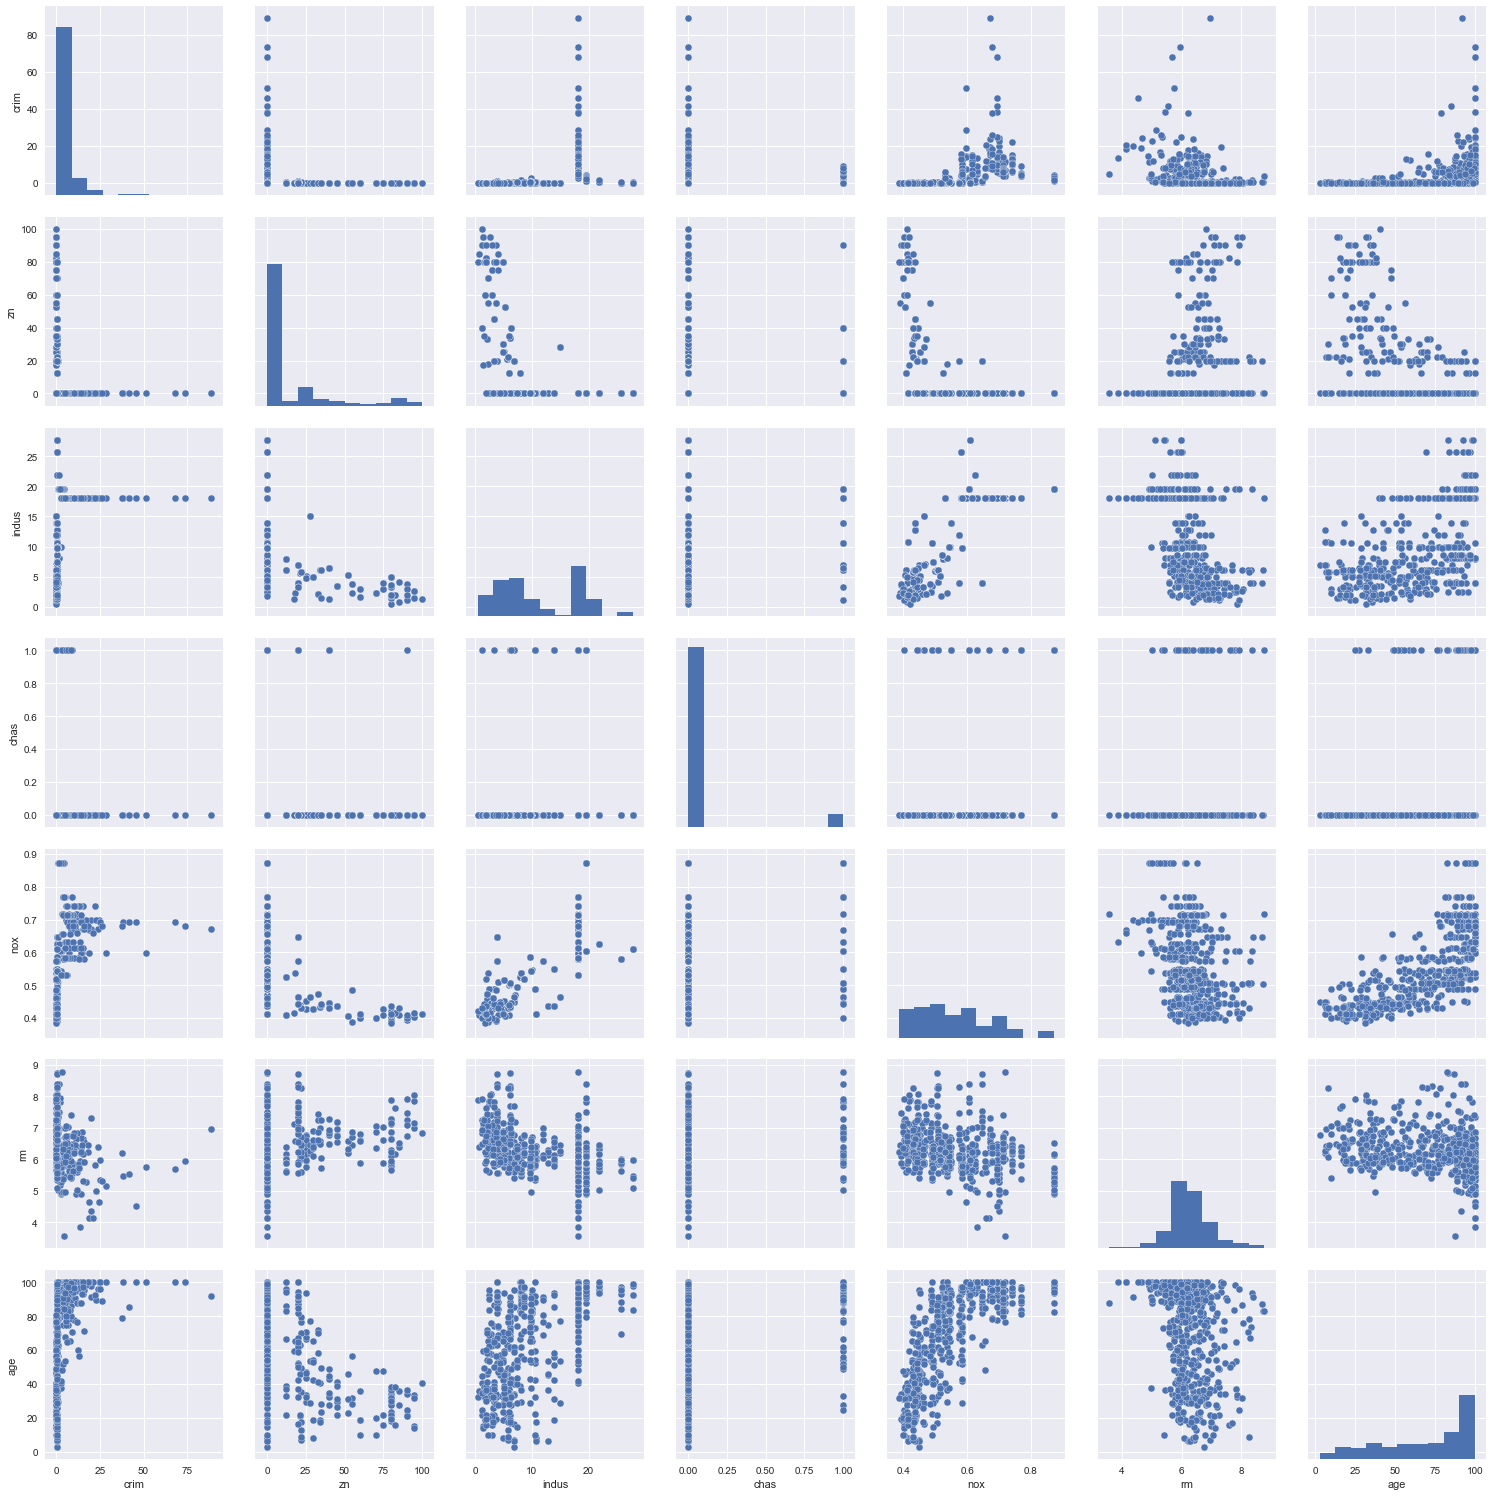

In [5]:
sns.pairplot(df[first_half], size=3)
plt.show()

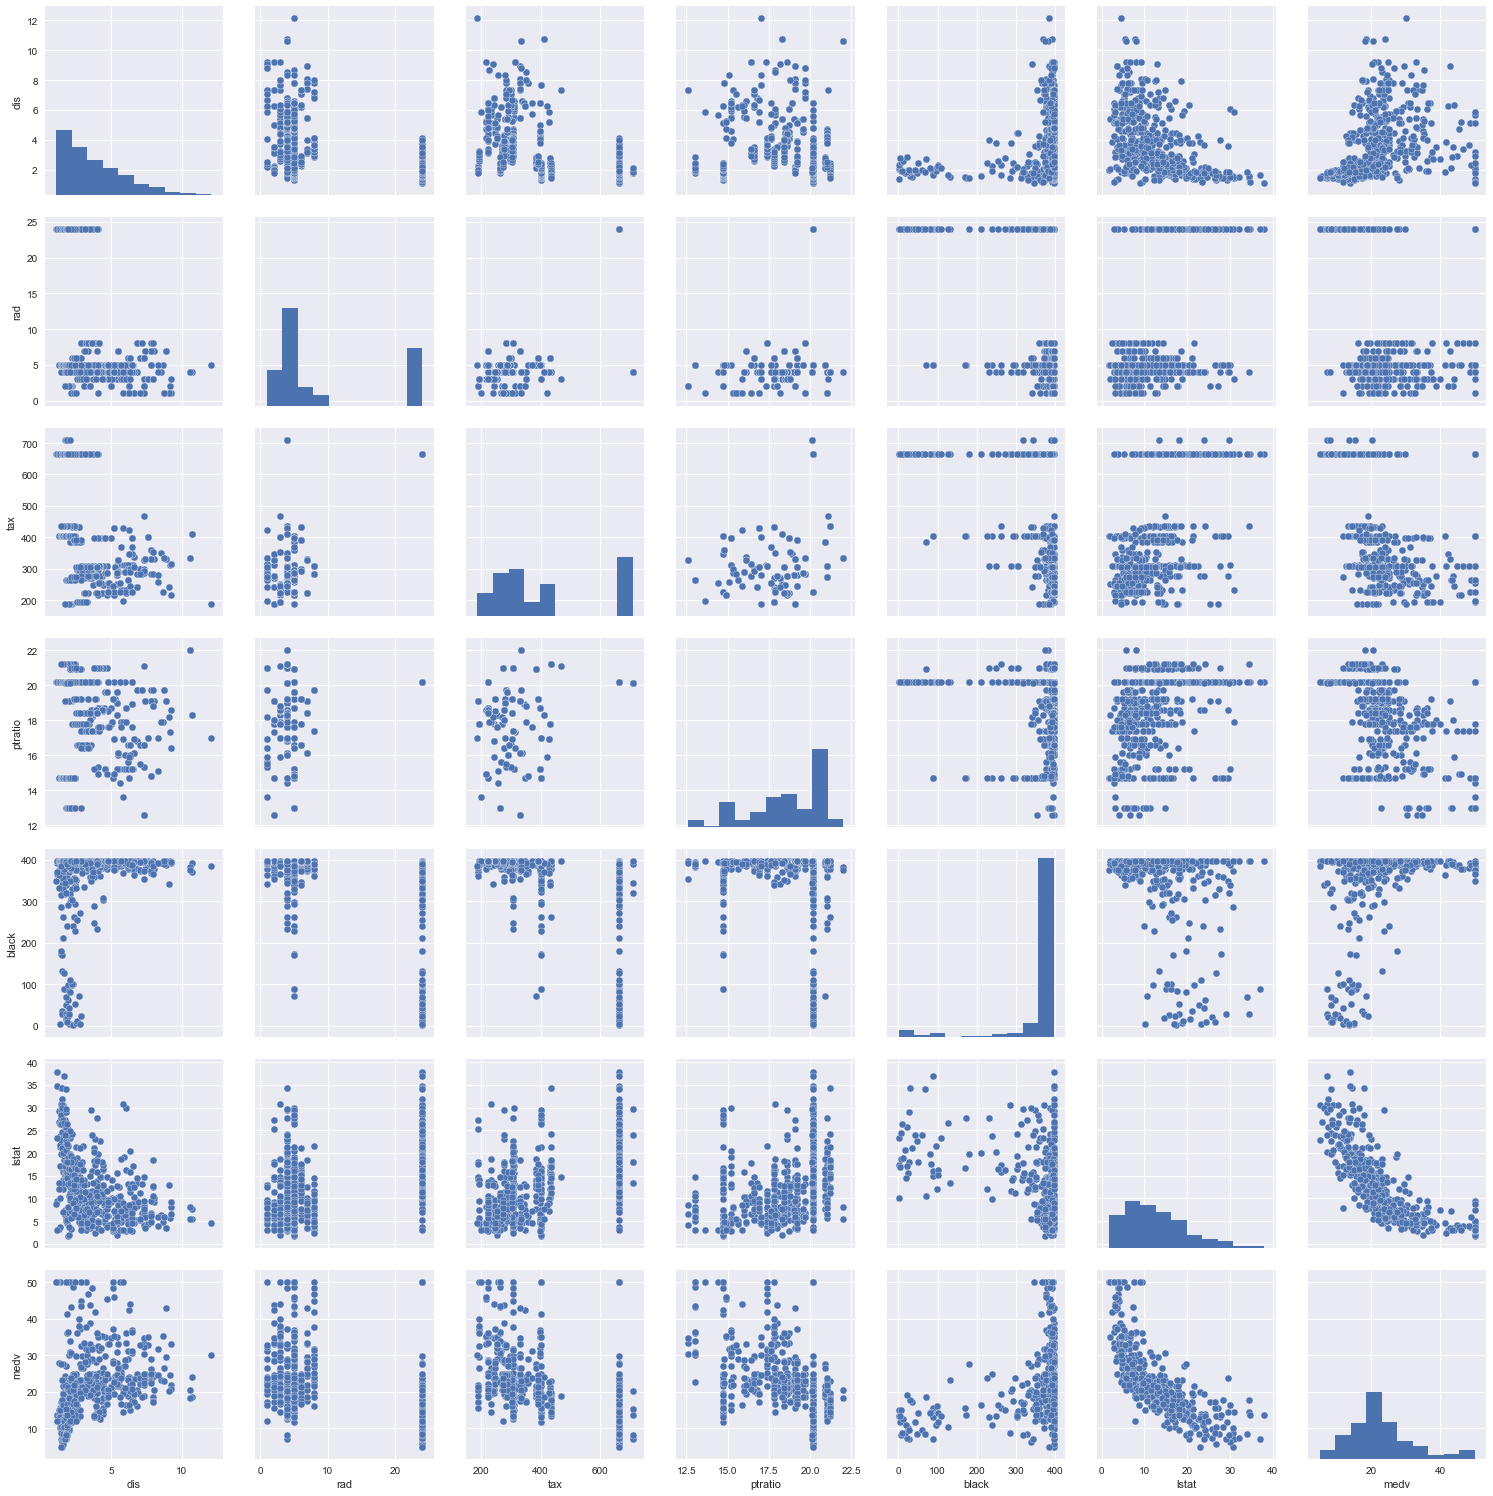

In [6]:
sns.pairplot(df[last_half], size=3)
plt.show()

**lstat** and **medv** seem to have a nearly linear relation. Other predictors don't have obvious relationship, at this moment of observing.

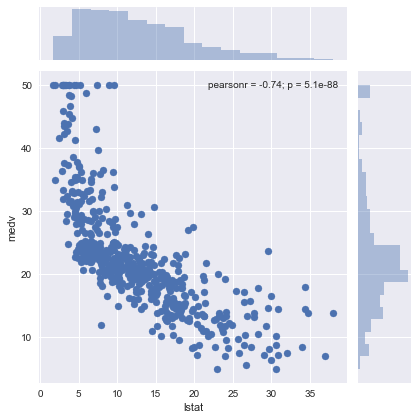

In [7]:
sns.jointplot(x="lstat", y="medv", data=df, size=6)
plt.show()

### (c)

In [8]:
cm = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

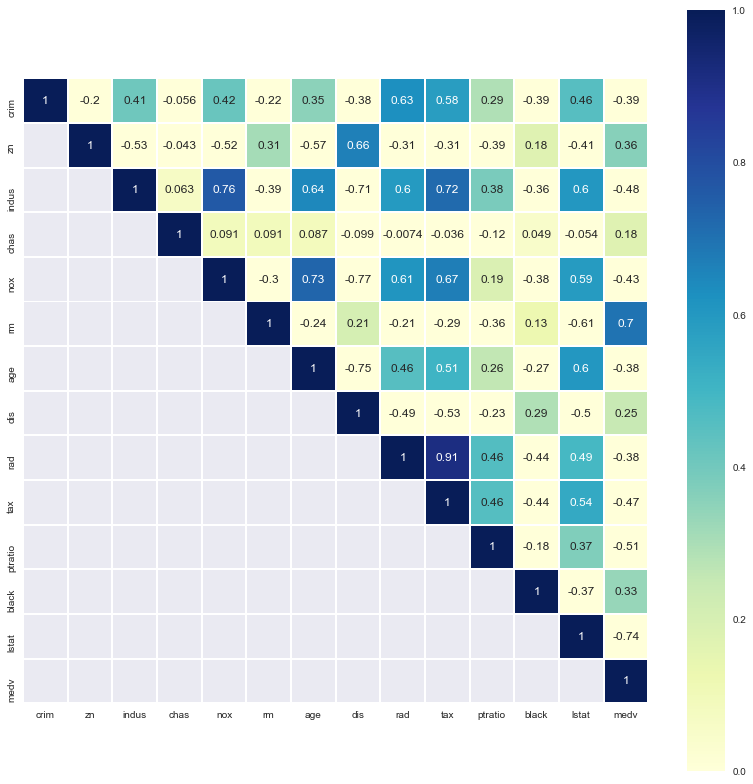

In [9]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=1, cmap='YlGnBu', square=True)
plt.show()

From the correlation heatmap we obtained above, we can say the top 3 most related (with **crim**) predictors are **rad**, **tax** and **lstat**. And they are all positively correlated.

These three significant correlations are ituitive to explain.

- With a higher **rad**, it's easier to leave further in a same time period compared with a region with lower **rad**.
- A region with a higher **tax** indicates that (generally) this region has more valuables.
- If percent of **lstat** is high, it's "safer" to crime.

### (d)

In [10]:
df.quantile([.5, 1])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.5,0.25651,0.0,9.69,0.0,0.538,6.2085,77.5,3.20745,5.0,330.0,19.05,391.44,11.36,21.2
1.0,88.97620,100.0,27.74,1.0,0.871,8.7800,100.0,12.12650,24.0,711.0,22.00,396.90,37.97,50.0


In [11]:
df.quantile([.95, 1])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.95,15.78915,80.0,21.89,1.0,0.740,7.5875,100.0,7.8278,24.0,666.0,21.0,396.9,26.8075,43.4
1.00,88.97620,100.0,27.74,1.0,0.871,8.7800,100.0,12.1265,24.0,711.0,22.0,396.9,37.9700,50.0


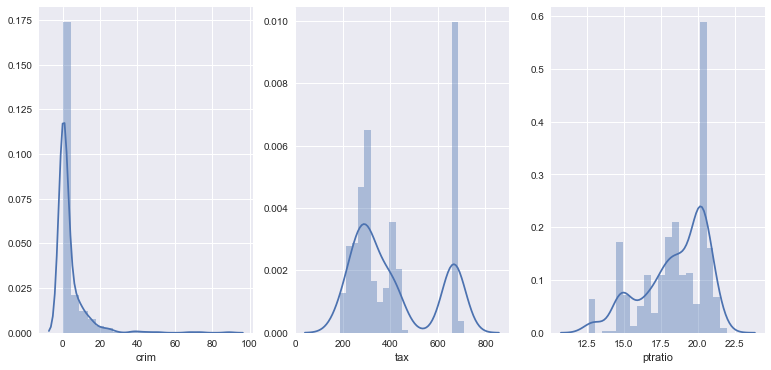

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 6))

sns.distplot(df['crim'], bins=20, ax=ax1)
sns.distplot(df['tax'], bins=20, ax=ax2)
sns.distplot(df['ptratio'], bins=20, ax=ax3)
plt.show()

### (e)

In [13]:
df.groupby('chas')['chas'].count()

chas
0    471
1     35
Name: chas, dtype: int64

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

There are 35 suburbs in this dataset bound the Charles River.

### (f)

In [14]:
df['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

The median pupil-teacher ratio is 19.05.

### (g)

In [15]:
df[df['medv'] == min(df['medv'])]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [16]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- crim above 3rd quartile
- zn is min
- indus at 3rd quartile
- chas at min
- nox above 3rd quartile
- rm above 1st quartile and is below 2nd quartile
- age at max
- dis below 1st quartile

The rest is ommited... 

### (h)

In [17]:
df[df['rm'] > 7].shape

(64, 14)

In [18]:
df[df['rm'] > 8].shape

(13, 14)

In [19]:
df[df['rm'] > 8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


These 13 surburbs have relatively lower crime (comparing range), lower lstat (comparing range) compare to others.